In [1]:
print("all ok")

all ok


In [2]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)


Project root added to path: c:\Users\tessd\ARRG2026\automated-research-report-generation


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
import os
from research_and_analyst import PROJECT_ROOT

os.environ["CONFIG_PATH"] = str(
    PROJECT_ROOT / "research_and_analyst" / "config" / "configuration.yaml"
)


In [5]:
model_loader = ModelLoader()

{"timestamp": "2026-01-24T19:45:04.436536Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2026-01-24T19:45:04.438541Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2026-01-24T19:45:04.439536Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["embedding_model", "retriever", "llm"], "timestamp": "2026-01-24T19:45:04.444229Z", "level": "info", "event": "YAML config loaded"}


In [6]:
llm=model_loader.load_llm()

{"provider": "openai", "model": "gpt-5.2", "timestamp": "2026-01-24T19:45:08.364842Z", "level": "info", "event": "Loading LLM"}


In [7]:
llm.invoke("hi").content

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hi—what can I help you with today?'

In [8]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

#HEALTH

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),

Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [9]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [10]:
Analyst(
    name="Tess Aquino",
    role="genai engineer",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='Tess Aquino', role='genai engineer', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [11]:
analyst = Analyst(
    name="Tess Aquino",
    role="genai engineer",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [12]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [13]:
analyst.name

'Tess Aquino'

In [14]:
analyst.role

'genai engineer'

In [15]:
analyst.affiliation

'AI Research LAB'

In [16]:
print(analyst.persona)

Name: Tess Aquino
Role: genai engineer
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [1]:
class Perspectives(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

NameError: name 'BaseModel' is not defined

In [18]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [19]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [20]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [21]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [22]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [23]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}

In [24]:
from langchain_core.messages import SystemMessage, HumanMessage

In [25]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Maya Chen', role='Clinical Evidence Analyst (Prevention & Chronic Disease)', affiliation='Public Health Outcomes Lab', description='Focuses on what is actually supported by high-quality evidence (RCTs, meta-analyses, guideline-grade studies) for preventing and managing common chronic conditions (e.g., cardiovascular disease, type 2 diabetes, obesity). Flags overstated claims, distinguishes correlation vs causation, and translates findings into practical risk-reduction actions (nutrition patterns, activity dose, sleep, blood pressure/lipids control) with clear effect sizes and limitations.'),
  Analyst(name='Samuel Okoye, MPH', role='Health Systems & Policy Analyst (Access, Quality, Cost)', affiliation='Center for Health Equity and Policy Evaluation', description='Examines how healthcare delivery and policy shape real-world health outcomes—access to primary care, medication affordability, insurance design, and quality/safety metrics. Prioritizes "real inf

In [26]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [27]:
def should_continue(state):
    """ Return the next node to execute """
    human_analyst_feedback = (state.get("human_analyst_feedback") or "").strip()
    if human_analyst_feedback:
        return "create_analyst"

In [28]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [29]:
from IPython.display import Image, display

## First Workflow

In [30]:
builder = StateGraph(GenerateAnalystsState)

In [31]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [ ]:
# modified from ChatGPT's suggestion
# builder.add_edge(START,"create_analyst")
# builder.add_edge("create_analyst", "human_feedback")
# builder.add_conditional_edges("human_feedback",
#                         should_continue,
#                         ["create_analyst",
#                         END])

In [32]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges(
    "human_feedback",
    should_continue,
    {
        "create_analyst": "create_analyst",
        "end": END,
    },
)


In [33]:
memory = MemorySaver()

In [34]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

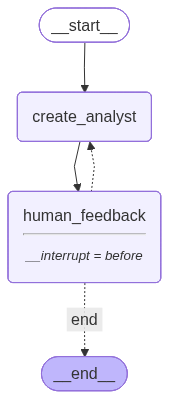

In [35]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [36]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [37]:
max_analysts = 4

In [38]:
thread =  {"configurable":{"thread_id":1}}

In [39]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Maya Chen
Affiliation: Enterprise AI Platform Team (Fortune 500)
Role: Platform AI Architect
Description: Evaluates LangGraph for production-grade agent orchestration: stateful graphs, deterministic control flow, tooling integration, and long-running workflows. Focuses on architectural fit, maintainability, deployment patterns, and how LangGraph reduces complexity versus ad-hoc chains or custom orchestrators.
--------------------------------------------------
Name: Ravi Patel
Affiliation: SRE & ML Platform (Cloud-native org)
Role: LLMOps / Reliability Engineer
Description: Assesses operational benefits: observability, debugging, retries, idempotency, checkpoints, and failure isolation in graph-based agents. Motivated by uptime, incident reduction, and safe rollouts; scrutinizes how LangGraph supports monitoring, traceability, and controlled execution in distributed environments.
--------------------------------------------------
Name: Elena García
Affiliation: GRC Office (Regulat

In [41]:
state = graph.get_state(thread)

In [ ]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Maya Chen', role='Agent Architecture & Orchestration Analyst', affiliation='Independent AI Systems Consultant (ex-Platform Engineering)', description='Focuses on how LangGraph’s graph-based execution model improves agent orchestration versus linear chains: explicit state management, branching/merging flows, cycles for iterative reasoning, human-in-the-loop checkpoints, and deterministic control over tool calling. Evaluates maintainability, debuggability, and how well complex multi-step agent workflows can be expressed and evolved over time.'), Analyst(name='Rafael Singh', role='Reliability, Observability & Governance Analyst', affiliation='Enterprise AI Governance Office', description='Assesses production readiness benefits of adopting LangGraph: traceability of agent decisions, audit logs, reproducibility, failure handling, retries, timeouts, and guardrail integration. Concentrates on operational concerns—monitoring, incident response, compliance (PII handling, policy enforcement), and how graph-structured agents enable clearer control points for approvals and risk management.'), Analyst(name='Elena Petrova', role='Performance, Cost & Scaling Analyst', affiliation='Applied ML Infrastructure Team', description='Analyzes runtime efficiency and scaling implications: parallel node execution, caching/memoization opportunities, controlling token/tool costs through structured flow, and minimizing redundant calls. Compares LangGraph’s overhead and concurrency model to alternatives, and estimates cost/performance tradeoffs for high-throughput agent services and batch workloads.'), Analyst(name='Jordan Okafor', role='Developer Experience & Ecosystem/Integration Analyst', affiliation='Developer Productivity (Internal Tools)', description='Examines adoption drivers for engineering teams: learning curve, API ergonomics, testing patterns, local iteration speed, and integration with LangChain ecosystem, model providers, and tool interfaces. Evaluates how LangGraph supports collaborative development (modular nodes, reusable subgraphs), CI-friendly validation, and migration paths from existing chain/agent implementations.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f950d-ae94-6086-8001-2e7e666e3d41'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-24T18:16:51.390477+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f950d-5e48-6c8b-8000-bcdc0dcea869'}}, tasks=(PregelTask(id='6964e1dc-5900-701f-7f48-70efac0db27b', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [42]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Maya Chen', role='Platform AI Architect', affiliation='Enterprise AI Platform Team (Fortune 500)', description='Evaluates LangGraph for production-grade agent orchestration: stateful graphs, deterministic control flow, tooling integration, and long-running workflows. Focuses on architectural fit, maintainability, deployment patterns, and how LangGraph reduces complexity versus ad-hoc chains or custom orchestrators.'),
  Analyst(name='Ravi Patel', role='LLMOps / Reliability Engineer', affiliation='SRE & ML Platform (Cloud-native org)', description='Assesses operational benefits: observability, debugging, retries, idempotency, checkpoints, and failure isolation in graph-based agents. Motivated by uptime, incident reduction, and safe rollouts; scrutinizes how LangGraph supports monitoring, traceability, and controlled execution in distributed environments.'),
  Analyst(nam

In [43]:
state.next

('human_feedback',)

In [44]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0f95d7-4371-6604-bfff-82430c5350fe': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2026-01-24T19:47:02.552729+00:00\xa2id\xd9$1f0f95d7-4371-6604-bfff-82430c5350fe\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.5411680441737757\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0f95d7-4373-6d08-8000-d0b78a888456': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2026-01-24T19:47:02.553728+00:00\xa2id\xd9$1f0f95d7-4373-6d08-8000-d0b78a888456\xb0channel_versions\x84\xa9__start__\xd9400000000000000000000000000000002.0.13962756020159195\xa5topic\xd9400000000000000000000000000000002.0.13962756020159195\xacmax_analysts\xd9400000000000000000000000000000002.0.13962756020159195\xb8branch:to:create_analyst\xd9400000000000000000000000000000002.0.13962756020159195\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start_

In [45]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f95d7-8f88-6469-8001-a8390a261705'}}

In [46]:
graph.update_state(thread,
               {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                  )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f95d8-736c-67b5-8002-78a89a683717'}}

In [47]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Maya Chen
Affiliation: Enterprise AI Platform Team (Fortune 500)
Role: Platform AI Architect
Description: Evaluates LangGraph for production-grade agent orchestration: stateful graphs, deterministic control flow, tooling integration, and long-running workflows. Focuses on architectural fit, maintainability, deployment patterns, and how LangGraph reduces complexity versus ad-hoc chains or custom orchestrators.
--------------------------------------------------
Name: Ravi Patel
Affiliation: SRE & ML Platform (Cloud-native org)
Role: LLMOps / Reliability Engineer
Description: Assesses operational benefits: observability, debugging, retries, idempotency, checkpoints, and failure isolation in graph-based agents. Motivated by uptime, incident reduction, and safe rollouts; scrutinizes how LangGraph supports monitoring, traceability, and controlled execution in distributed environments.
--------------------------------------------------
Name: Elena García
Affiliation: GRC Office (Regulat

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Maya Chen
Affiliation: Global Systems Integrator (GSI) — AI Platforms Practice
Role: Enterprise AI Platform & Architecture Analyst
Description: Evaluates LangGraph’s benefits as an agent framework for large enterprises: governance, security boundaries, deployment patterns (VPC/on‑prem), observability, audit trails, and integration with existing data/identity stacks. Focuses on how LangGraph’s graph-based control flow, state management, and deterministic routing improve reliability and maintainability versus ad-hoc agent chains, especially for regulated and multi-team environments.
--------------------------------------------------
Name: Rafael Iqbal
Affiliation: Enterprise SaaS Provider — GenAI Product Strategy
Role: Applied GenAI Product & Workflow Analyst
Description: Focuses on the latest enterprise applications of agentic systems (customer support automation, IT ops copilots, sales ops, back-office process automation). Assesses how LangGraph enables complex, multi-step workfl

In [48]:
state = graph.get_state(thread)

In [49]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Maya Chen', role='Enterprise AI Platform & Architecture Analyst', affiliation='Global Systems Integrator (GSI) — AI Platforms Practice', description='Evaluates LangGraph’s benefits as an agent framework for large enterprises: governance, security boundaries, deployment patterns (VPC/on‑prem), observability, audit trails, and integration with existing data/identity stacks. Focuses on how LangGraph’s graph-based control flow, state management, and deterministic routing improve reliability and maintainability versus ad-hoc agent chains, especially for regulated and multi-team environments.'), Analyst(name='Rafael Iqbal', role='Applied GenAI Product & Workflow Analyst', affiliation='Enterprise SaaS Provider — GenAI Product Strategy', desc

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Maya Chen', role='Enterprise AI Platform Strategist', affiliation='Fortune 100 Data & AI Office', description='Evaluates LangGraph as a standardized agent framework for large organizations: governance, security boundaries, auditability, reproducibility, and integration with existing platform stacks (Kubernetes, service meshes, secrets management, IAM). Focuses on how LangGraph’s graph-based orchestration improves reliability, controllability, and compliance for enterprise-grade agentic workflows and how it reduces platform fragmentation across teams.'), Analyst(name='Ravi Iyer', role='Applied Agent Architect (Latest Enterprise Applications)', affiliation='Global Systems Integrator (AI Delivery Practice)', description='Focuses on current, high-impact enterprise use cases (agentic RAG over internal knowledge, IT ops copilots, customer support resolution agents, finance/contract review, security triage). Assesses benefits of LangGraph for production patterns—human-in-the-loop checkpoints, multi-step tool calling, long-running workflows, state persistence, deterministic routing, and resilience—mapped to measurable outcomes like resolution time, deflection, and accuracy.'), Analyst(name='Elena García', role='Startup CTO / Product-Led Engineering Analyst', affiliation='B2B SaaS Startup (Series A)', description='Analyzes LangGraph from a startup adoption perspective: speed to MVP, developer experience, iteration velocity, cost control, and path from prototype to production without a rewrite. Prioritizes pragmatic advantages—clear workflow modeling, testability, observability hooks, and maintainability—while weighing tradeoffs like learning curve, ecosystem lock-in, and how LangGraph can differentiate product features (custom agent flows, customer-specific policies, rapid experimentation).'), Analyst(name='Noah Stein', role='Reliability & MLOps/LLMOps Analyst', affiliation='Cloud Provider AI Reliability Engineering', description='Concentrates on operational benefits of LangGraph: debugging complex agent behavior, tracing/telemetry, evaluation harnesses, regression testing, versioning of prompts/tools, and incident response. Assesses how graph structure and explicit state management can reduce stochastic failures, enable safer rollouts (canaries, feature flags), support SLA/SLO targets, and improve run cost predictability through caching, retries, and bounded execution paths.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f9512-63b9-673d-8005-1406c6c56bc9'}}, metadata={'source': 'loop', 'step': 5, 'parents': {}}, created_at='2026-01-24T18:18:57.759212+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f9511-f11e-6b00-8004-217295aaff15'}}, tasks=(PregelTask(id='ac4baae9-74bc-9ed9-6f47-6cddc5f10733', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [50]:
state.next

('human_feedback',)

In [51]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Maya Chen', role='Enterprise AI Platform & Architecture Analyst', affiliation='Global Systems Integrator (GSI) — AI Platforms Practice', description='Evaluates LangGraph’s benefits as an agent framework for large enterprises: governance, security boundaries, deployment patterns (VPC/on‑prem), observability, audit trails, and integration with existing data/identity stacks. Focuses on how LangGraph’s graph-based control flow, state management, and deterministic routing improve reliability and maintainability versus ad-hoc agent chains, especially for regulated and multi-team environments.'),
  Analyst(name='Rafael Iqbal', role='Applied GenAI Product & Workflow Analyst', affiliation='Enterprise SaaS Provider — GenAI Product Strategy', description='Focuses

In [52]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [53]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [54]:
# replaced this with next cell, since it is crashing
# # 3) Update feedback at the 'human_feedback' node
# #    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
# graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

In [55]:
graph.update_state(
    cfg,
    {"human_analyst_feedback": "Add startup POV + latest enterprise use cases"},
    as_node="human_feedback",
)
graph.invoke(None, cfg)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Maya Chen', role='Enterprise AI Platform Architect', affiliation='Global Financial Services (CIO Office)', description='Evaluates LangGraph as a governed agent framework for enterprise-grade deployments. Focuses on reliability, observability, auditability, policy controls, identity/access, environment promotion (dev→prod), and integration with existing LLMOps/MLOps. Motivated by reducing production incident risk while enabling scalable agent workflows across business units.'),
  Analyst(name='Raj Patel', role='Startup CTO / Product-Led Growth Engineer', affiliation='Seed-stage B2B SaaS Startup', description='Assesses benefits of adopting LangGraph from a startup perspective: fastest path to shippable agent features, iteration speed, cost control, and m

In [56]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)

('human_feedback',)


In [57]:
analysts = final_state.values.get('analysts')

In [58]:
analysts

[Analyst(name='Maya Chen', role='Enterprise AI Platform Architect', affiliation='Global Financial Services (CIO Office)', description='Evaluates LangGraph as a governed agent framework for enterprise-grade deployments. Focuses on reliability, observability, auditability, policy controls, identity/access, environment promotion (dev→prod), and integration with existing LLMOps/MLOps. Motivated by reducing production incident risk while enabling scalable agent workflows across business units.'),
 Analyst(name='Raj Patel', role='Startup CTO / Product-Led Growth Engineer', affiliation='Seed-stage B2B SaaS Startup', description='Assesses benefits of adopting LangGraph from a startup perspective: fastest path to shippable agent features, iteration speed, cost control, and maintainability with a small team. Focuses on how LangGraph’s composable graphs, state management, and debugging help avoid “prototype trap,” enabling rapid experiments (tools, RAG, multi-agent) that can be productionized wit

In [59]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Maya Chen
Affiliation: Global Financial Services (CIO Office)
Role: Enterprise AI Platform Architect
Description: Evaluates LangGraph as a governed agent framework for enterprise-grade deployments. Focuses on reliability, observability, auditability, policy controls, identity/access, environment promotion (dev→prod), and integration with existing LLMOps/MLOps. Motivated by reducing production incident risk while enabling scalable agent workflows across business units.
--------------------------------------------------
Name: Raj Patel
Affiliation: Seed-stage B2B SaaS Startup
Role: Startup CTO / Product-Led Growth Engineer
Description: Assesses benefits of adopting LangGraph from a startup perspective: fastest path to shippable agent features, iteration speed, cost control, and maintainability with a small team. Focuses on how LangGraph’s composable graphs, state management, and debugging help avoid “prototype trap,” enabling rapid experiments (tools, RAG, multi-agent) that can be 

In [60]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [ ]:
config = {"configurable": {"thread_id": "1"}}

result = graph.invoke(
    {
        "topic": "the benefits of adopting Langgraph as an agent framework",
        "max_analysts": 4,
        "human_analyst_feedback": "add something from the startup perspective and focus on the latest enterprise application",
        # plus whatever else your state schema requires...
    },
    config=config,
)


## Second Workflow

In [ ]:
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END


In [2]:
class InterviewState(BaseModel):
    pass

In [3]:
interview_builder = StateGraph(InterviewState)

In [4]:
def ask_question(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass


In [5]:
def search_web(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [6]:
def search_wikipedia(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [7]:
def generate_answer(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [8]:
def router_messages(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [9]:
def save_interview(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [10]:
def write_section(state:InterviewState):
    """

    Args:
        state (InterviewState): _description_
    """
    pass

In [11]:
interview_builder.add_node("ask_question",ask_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [12]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                        router_messages,
                        ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [14]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()


In [15]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

In [17]:
from IPython.display import Image, display

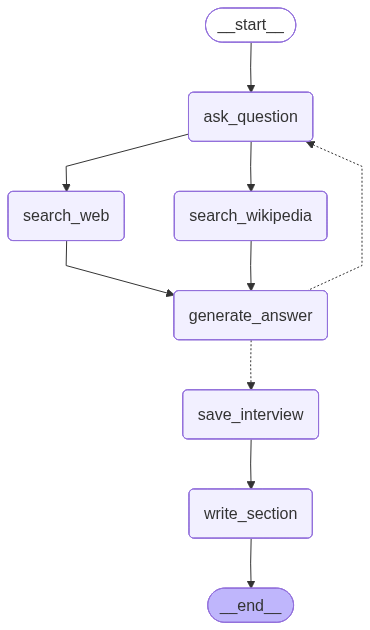

In [18]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

## Third Workflow